## 1.  $Gram-Schmidt$ orthogonization and $QR$ decomposition
#### Let matrix $\large{\bar{A}_{n\times n}}$ be
$$
\Large{
    \bar{A} = [\vec{a}_1, \vec{a}_2, \cdots, \vec{a}_n] \tag{1.1},
}
$$
#### and set $\large{\vec{p}_1=\vec{a}_1}$, we decompose $\large{\vec{a}_2,\cdots, \vec{a}_n}$ as
$$
\Large{
\begin{aligned}
    \vec{p}_2 &= \vec{a}_2 - \frac{\vec{p}_1^T\vec{a}_2}{\vec{p}_1^T\vec{p}_1}\vec{p}_1\\
    \vec{p}_3 &= \vec{a}_3 - \frac{\vec{p}_1^T\vec{a}_3}{\vec{p}_1^T\vec{p}_1}\vec{p}_1-\frac{\vec{p}_2^T\vec{a}_3}{\vec{p}_2^T\vec{p}_2}\vec{p}_2\\
    &\vdots\\
    \vec{p}_n &= \vec{a}_n-\frac{\vec{p}_1^T\vec{a}_n}{\vec{p}_1^T\vec{p}_1}\vec{p}_1-\frac{\vec{p}_2^T\vec{a}_n}{\vec{p}_2^T\vec{p}_2}\vec{p}_2-\cdots -\frac{\vec{p}_{n-1}^T\vec{a}_n}{\vec{p}_{n-1}^T\vec{p}_{n-1}}\vec{p}_{n-1}
\end{aligned} \tag{1.2}.
}
$$
#### We normalize the vectors $\large{\vec{p}_i}$
$$
\Large{
    \vec{q}_i = \frac{\vec{p}_i}{|\vec{p}_i|} \tag{1.3},
}
$$
#### and let matrix $\large{\bar{Q}}$ be
$$
\Large{
    \bar{Q} = [\vec{q}_1, \vec{q}_2, \cdots, \vec{q}_n] \tag{1.4}.
}
$$
#### We define a new matrix $\large{\bar{R}}$ as
$$
\Large{
    \bar{R}_{ij} = \vec{q}_i^T \vec{a}_j \tag{1.5},
}
$$
#### where, we can prove that 
$$
\Large{
    \vec{q}_i \cdot \vec{a}_j = 0, \text{ for } i > j \tag{1.6}.
}
$$
#### So the matrix $\large{\bar{R}}$ is upper triangular, and
$$
\Large{
    \bar{A} = \bar{Q}\bar{R} \tag{1.7}.
}
$$

In [135]:
import numpy as np
import matplotlib.pyplot as plt

def solve_lin_eq_with_QR_decom(A, b):
    n = len(A[0])
    P = np.empty_like(A)
    P[: 0] = A[: 0]
    for i in range(1, n):
        tmp = A[:, i]
        for j in range(i):
            tmp += -np.dot(P[:, j], A[:, i]) / np.dot(P[:, j], P[:, j]) * P[:, j]
        P[:, i] = tmp
    Q = np.empty_like(P); R = np.zeros_like(P)
    for i in range(n):
        Q[:, i] = P[:, i] / np.linalg.norm(P[:, i])
        for j in range(n):
            R[i, j] = Q[:, i].T @ A[:, j]
            
    plt.figure(figsize=(10, 2.5))
    plt.subplot(131)
    plt.pcolormesh(A, cmap='seismic', vmin=-1, vmax=1)
    plt.colorbar()
    ax = plt.gca()
    ax.invert_yaxis()
    plt.title(r'$\bar{A}$', fontsize=14)
    plt.subplot(132)
    plt.pcolormesh(Q, cmap='seismic', vmin=-1, vmax=1)
    plt.colorbar()
    ax = plt.gca()
    ax.invert_yaxis()
    plt.title(r'$\bar{Q}$', fontsize=14)
    plt.subplot(133)
    plt.pcolormesh(R, cmap='seismic', vmin=-1, vmax=1)
    plt.colorbar()
    ax = plt.gca()
    ax.invert_yaxis()
    plt.title(r'$\bar{R}$', fontsize=14)
    plt.show()

#     return np.linalg.inv(R) @ Q.T @ b
        

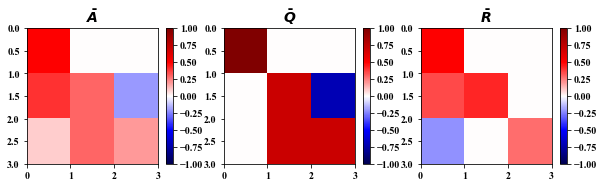

In [144]:
n = 3
A = np.array([[.5, .2, .4],
             [.4, .3, .1],
              [.1, .3, .5]])
# A = np.random.random((n, n))
print('')
bb = np.random.random(n).T
solve_lin_eq_with_QR_decom(A, bb)

$\rule[0mm]{30cm}{.5mm}$
## $\text{2. Jacobi's iteration}$
#### For the numerical solutions to eigensystem with $\large{Jacobi's}$ iteration method for matrix $\large{\bar{A}}$,
#### we follow these steps blow to find eigenvalues and corresponding eigenvectors.
$$
\large{
\begin{aligned}
    &\boxed{\text{Step 1}} \text{: Finding the index of the maximal absolute value for off-diagonal element } p \& q;\\ \\
    &\boxed{\text{Step 2}} \text{: Computing } \theta \text{ with } \theta = \frac{1}{2}tan^{-1}\frac{2A_{pq}}{A_{pp}-A_{qq}};\\ \\
    &\boxed{\text{Step 3}} \text{: Finding othogonal matrix } \bar{R} \text{ with setting }
        R_{pp}=R_{qq}=cos(\theta); \ R_{pq}=-R_{qp}=-sin(\theta); R_{ii}=1, \text{ for }i\not=p,q; \ \text{ and off-diagonal elements zero};\\ \\
    &\boxed{\text{Step 4}} \text{: Computing matrix }\bar{A}_k, \bar{A_k}=\bar{R}^T\bar{A}\bar{R} \text{ and checking the error to dtermin whether stop iterating};\\ \\
    & \bigcirc \text{ Setting } \bar{A}=\bar{A}_k \text{ and repeat steps 1 - 4 if it doesn't satisfy the accuracy.}
\end{aligned}
}
$$

In [27]:
import numpy as np

# Finding othogonal matrix
def get_orth_mat(a_pp, a_qq, a_pq, p, q, n):
    theta = .5 * np.arctan(2*a_pq/(a_pp-a_qq))
    R = np.eye(n)
    cosp = np.cos(theta); sinp = np.sin(theta)
    R[p, p] = cosp; R[q, q] = cosp
    R[p, q] = -sinp; R[q, p] = sinp
    return R

# Fing the index of the maximal absolute value of off-diagonal element.
def get_max_ele_index(A):
    n = len(A[0])
    p = 1e-10; index = [0, 0]
    for i in range(n-1):
        for j in range(i+1, n):
            if abs(A[i, j]) > p:
                p = abs(A[i, j])
                index = [i, j]
    return index

# Checking error
def check_error(A):
    n = len(A); e = 0.
    for i in range(1, n-1):
        for j in range(i+1, n):
            e += abs(A[i, j])
    return 2*e

# Jacobi's iteration method.
def jacobi_ite(A, n_max=100, tol=1e-6):
    n = len(A[0]); ite = 0
    A1 = A; e = check_error(A1)
    eivec = np.eye(n)
    while ite < n_max and e >= tol:
        p, q = get_max_ele_index(A1)
        R = get_orth_mat(A1[p, p], A1[q, q], A1[p, q], p, q, n)
        eivec = eivec @ R
        A1 = R.T @ A1 @ R
        e = check_error(A1)
        ite += 1
    eival = A1[range(n), range(n)]
    return eival, eivec, e

In [28]:
# Test on a matrix given by Example 11.7 in textbook.
A = np.array([[8, -1, 3, -1],
             [-1, 6, 2, 0],
             [3, 2, 9, 1],
             [-1, 0, 1, 7]])

eival, eivec, e = jacobi_ite(A, n_max=17, tol=1e-6)
print('\neigenvalues:\n', eival, '\neigenvectors:\n', eivec)


eigenvalues:
 [ 3.29569866  8.40766196 11.70430134  6.59233804] 
eigenvectors:
 [[ 0.52877937 -0.57304222  0.58229764  0.23009661]
 [ 0.59196687  0.47230121  0.17577559 -0.62897514]
 [-0.53603872  0.28204972  0.79248727 -0.07123465]
 [ 0.2874545   0.60745546  0.04468031  0.73916943]]


In [7]:
print(np.linalg.eigh(A)[0])

[ 3.29569866  6.59233804  8.40766196 11.70430134]
